## Trabalho Prático de Introdução ao Processamento Digital de Imagens

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import numpy as np
from joblib import Parallel, delayed

### RGB-HSB-RGB conversion

In [2]:
def rgb_to_hsb(pixel, mods=None):
    R, G, B = pixel
    pixel  =  R / 255, G / 255, B / 255
    R, G, B = pixel

    MAX = max(pixel)
    MIN = min(pixel)  
    
    # Hue value
    H = None
    S = None
    if(MAX == MIN):
        H = 0
    elif((MAX == R)):
        if(G >= B):
            H = 60 * ((G - B)/(MAX - MIN))
        else:
            H = (60 * ((G - B)/(MAX - MIN))) + 360
    
    elif(MAX == G):
        H = (60 * ((B - R)/(MAX - MIN))) + 120
    
    elif(MAX == B):
        H = (60 * ((R - G)/(MAX - MIN))) + 240

    # Saturation
    if(MAX == 0):
        S = 0
    else:
        S = 1 - (MIN/ MAX)

    #Value
    B = MAX

    if mods == None:
        return round(H), round(S, 2), round(B, 2)
    else:
        # angle factor
        H_ = H + mods["angle_factor"]
   
        if(H_ > 360):
            H = H_ - 360
        elif(H_ < 0):
            H = 360 + H_
        else:
            H  = H_

        S_ = S * mods["sat_factor"]
        S = S_ if S_ <= 1 else 1
        
        return round(H), round(S, 2), round(B, 2)

def hsb_to_rgb(pixel):
    
    H, S, V = pixel

    C = V * S

    X = C * (1 - abs((H /60) % 2 - 1))

    m = V - C

    if(0 <= H < 60):
        R_ = C
        G_ = X
        B_ = 0   

    elif(60 <= H < 120):
        R_ = X
        G_ = C
        B_ = 0 

    elif(120 <= H < 180):
        R_ = 0
        G_ = C
        B_ = X 
    
    elif(180 <= H < 240):
        R_ = 0
        G_ = X
        B_ = C
    
    elif(240 <= H < 300):
        R_ = X
        G_ = 0
        B_ = C 

    elif(300 <= H <= 360):
        R_ = C
        G_ = 0
        B_ = X
    
    
    R, G, B  = ((R_ + m) * 255, (G_ + m) * 255, (B_ + m) * 255)
    
    return  int(R), int(G), int(B)

# def hsb_to_rgb(pixel):
#     H, S, V = pixel

#     H_ = int((H / 60) % 6)

#     f = (H / 60) - H_
#     p = V * (1 - S)
#     q = V * (1 - (f*S))
#     t = V * (1 - ((1 - f) * S))

#     if(H_ == 0):
#         #print("entrei 0")
#         return int(255*V) , int(255*t) , int(255*p) # R, G, B
#     elif(H_ == 1):
#         #print("entrei 1")
#         return int(255*q) , int(255*V) , int(255*p) # R, G, B
#     elif(H_ == 2):
#         #print("entrei 2")
#         return int(255*p) , int(255*V) , int(255*t) # R, G, B
#     elif(H_ == 3):
#         #print("entrei 3")
#         return int(255*p) , int(255*q) , int(255*V) # R, G, B
#     elif(H_ == 4):
#         #print("entrei 4")
#         return int(255*t) , int(255*p) , int(255*V) # R, G, B
#     elif(H_ >= 5):
#         #print("entrei 5")
#         return int(255*V) , int(255*q) , int(255*p) # R, G, B
    
#     else:
#         print(H,S,V)
#         print(H_)

def apply_rgb_to_hsb(img , mods=None):
    height , width, _ = img.shape

    image_result = []
    for i in range(height):
        column = []
        for j in range(width):
            column.append(list(rgb_to_hsb(img[i][j], mods)))
        image_result.append(column)

    return np.array(image_result)

def apply_hsb_to_rgb(img):
    height , width, _ = img.shape

    image_result = []
    for i in range(height):
        column = []
        for j in range(width):
            column.append(list(hsb_to_rgb(img[i][j])))
        image_result.append(column)

    return np.array(image_result)

def negative(pixel):
    R, G, B = pixel
    
    L = 256
    s = lambda r : L - 1 - r

    return s(R), s(G), s(B)

def apply_negative(img):
    height , width, _ = img.shape

    image_result = []
    for i in range(height):
        column = []
        for j in range(width):
            column.append(list(negative(img[i][j])))
        image_result.append(column)

    return np.array(image_result)

negative_B = lambda x : 1 - x 

#### Modify the Hue and Saturation and then convert back to rgb

In [28]:
img = cv2.cvtColor(cv2.imread("testpat.1k.color2.tif"), cv2.COLOR_BGR2RGB)

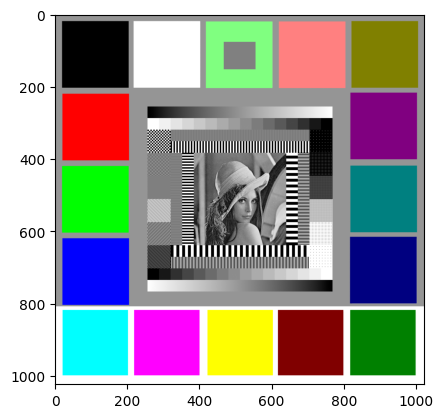

In [4]:
plt.imshow(img)

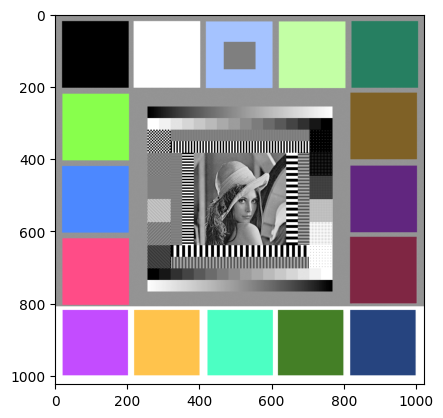

In [29]:
mods = {
    "angle_factor": 100,
    "sat_factor": 0.70
}

matrix_rgb_to_hsb = np.apply_along_axis(rgb_to_hsb, 2, img, mods=mods)
matrix_hsb_to_rgb = np.apply_along_axis(hsb_to_rgb, 2, matrix_rgb_to_hsb)

plt.imshow(matrix_hsb_to_rgb)

#### Modify R, G, B channels applying Negative effect (s = L-1-r)

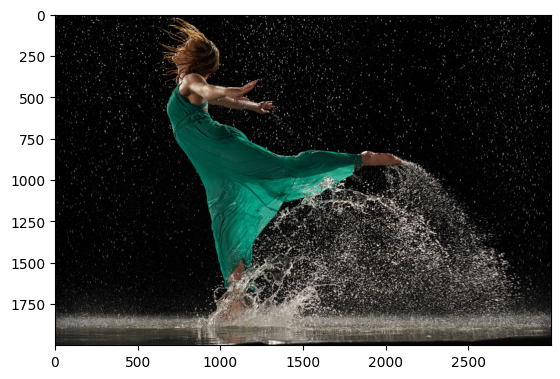

In [6]:
img = cv2.cvtColor(cv2.imread("DancingInWater.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)

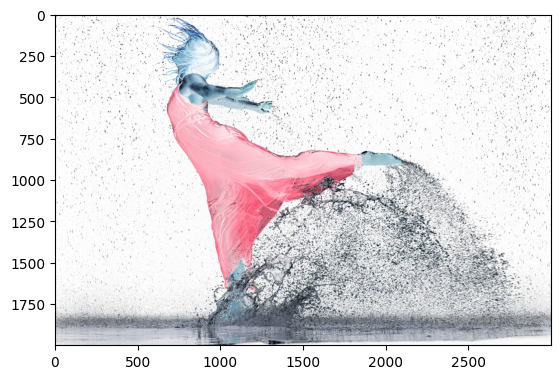

In [7]:
negative_img = apply_negative(img)
plt.imshow(negative_img)

#### Modify negate B from HSB space and convert back to RGB

In [8]:
img_rgb_to_hsb = apply_rgb_to_hsb(img)
img_rgb_to_hsb[:, :, -1] = negative_B(img_rgb_to_hsb[:, :, -1])
img_hsb_to_rgb = apply_hsb_to_rgb(img_rgb_to_hsb)

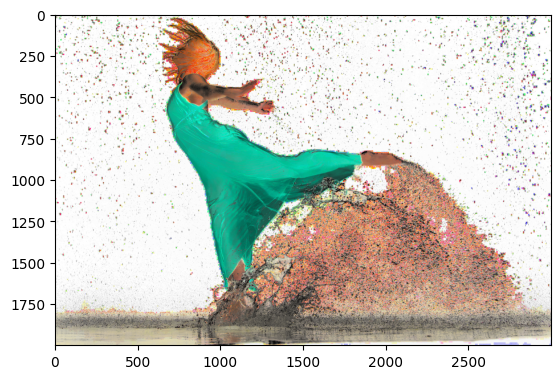

In [9]:
plt.imshow(img_hsb_to_rgb)

### Correlação

In [10]:
def load_filter(filter_path):
    with open(filter_path, 'r') as file:
        line = file.readline()
        values = [float(x) for x in line.split()]
    
    m =  int(values[0])
    n = int(values[1])
    stride = int(values[2])

    filter = []
    for i in range(0, m):
        row = []
        for j in range(0, n):    
            row.append(values[3:][i*n + j])
        filter.append(row)
    
    return stride, np.array(filter)

"""
def correlation2D(matrix, filter, stride):
    nh = matrix.shape[0]
    nw = matrix.shape[1]
    sh = stride
    sw = stride
    kh = filter.shape[0]
    kw = filter.shape[1]

    max_w_it = int((nw - kw + sw) / sw)
    max_h_it = int((nh - kh + sh ) / sh)

    matrix_output = np.zeros((max_h_it, max_w_it))
    
    h = 0
    for i in range(0, max_h_it):
        w = 0
        for j in range(0, max_w_it):
            value = qml.math.frobenius_inner_product(matrix[h:h+kh, w:w+kw], filter)
            matrix_output[i,j] = round(value)
            w += sw
        h += sh
        
    return matrix_output.astype(int)
"""

def correlation2D(matrix, filter, stride):
    nh = matrix.shape[0]
    nw = matrix.shape[1]
    sh = stride
    sw = stride
    kh = filter.shape[0]
    kw = filter.shape[1]

    max_w_it = int((nw - kw + sw) / sw)
    max_h_it = int((nh - kh + sh ) / sh)

    # print(max_h_it, max_w_it)
    # print(max_h_it * sh,max_w_it * sw)

    def calculate_value(h, w):
        return round(np.sum(matrix[h:h+kh, w:w+kw] * filter))

    matrix_output = Parallel(n_jobs=-1)(delayed(calculate_value)(h, w)
                                         for h in range(0, max_h_it * sh, sh)
                                         for w in range(0, max_w_it * sw, sw))
    
    matrix_output = np.array(matrix_output).reshape(max_h_it, max_w_it).astype(int)
    
    return matrix_output

"""
def apply_correlation(matrix, filter, stride=1):
    if(stride > 1):
        return convolve2d(matrix, filter, mode='valid')[::stride, ::stride].astype(int)
    else:
        return convolve2d(matrix, filter, mode='valid').astype(int)
"""

def apply_transform_box(image_channels, stride, filter):
    # Record the start time
    start_time = time.time()

    R, G, B = image_channels
    
    R_box = correlation2D(R, filter, stride)
    G_box = correlation2D(G, filter, stride)
    B_box = correlation2D(B, filter, stride)

    img_merged_box = cv2.merge((R_box, G_box, B_box))

    # Record the end time
    end_time = time.time()
    
    return img_merged_box, end_time - start_time

def histogram_expansion(matrix):
    r_max = matrix.max()
    r_min = matrix.min()
    l = 255

    expansion = lambda r : round((r - r_min) * (l - 1) / (r_max - r_min))

    return np.vectorize(expansion)(matrix)

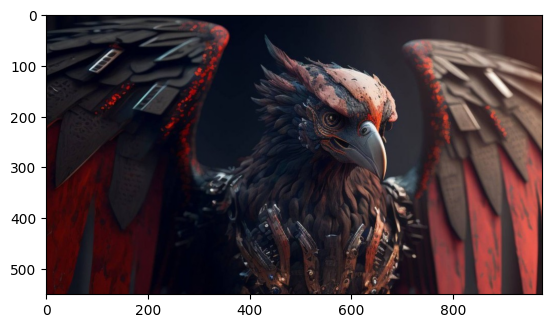

In [11]:
img = cv2.cvtColor(cv2.imread("mascote-flamengo.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### Filtro box 15x15

Execution time: 7364.146ms


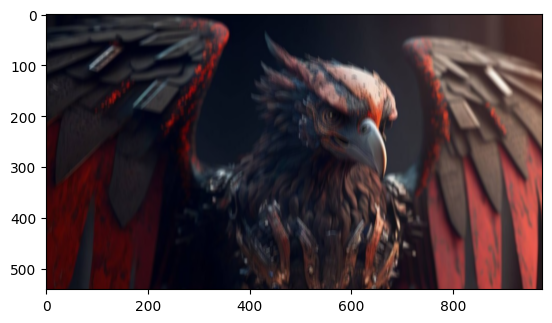

In [12]:
stride_15x15, filter_box_15x15 = load_filter("filtro_box_15x15.txt")
img_merged_box_15x15, exec_time_box_15x15 = apply_transform_box(cv2.split(img), stride_15x15, filter_box_15x15)
plt.imshow(img_merged_box_15x15)
print(f"Execution time: {round(exec_time_box_15x15*1000, 3)}ms")

#### Box filter 1x15 followed by box filter 15x1

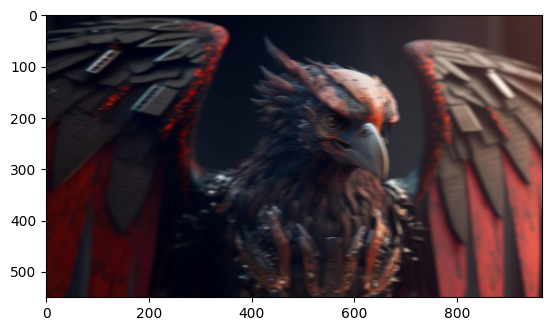

In [13]:
stride_1x15, filter_box_1x15 = load_filter("filtro_box_1x15.txt")

img_merged_box_1x15, exec_time_box_1x15 = apply_transform_box(cv2.split(img), stride_1x15, filter_box_1x15)

plt.imshow(img_merged_box_1x15)

Execution time: 14420.009ms


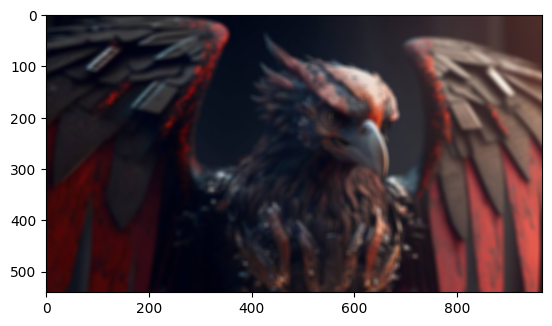

In [14]:
stride_1x15, filter_box_1x15 = load_filter("filtro_box_1x15.txt")

img_merged_box_1x15, exec_time_box_1x15 = apply_transform_box(cv2.split(img), stride_1x15, filter_box_1x15)

stride_15x1, filter_box_15x1 = load_filter("filtro_box_15x1.txt")
img_merged_box_15x1, exec_time_box_15x1 = apply_transform_box(cv2.split(img_merged_box_1x15), stride_15x1, filter_box_15x1)

print(f"Execution time: {round((exec_time_box_1x15 + exec_time_box_15x1)*1000, 3)}ms")
plt.imshow(img_merged_box_15x1)

### Filtro de Sobel

In [15]:
img = cv2.cvtColor(cv2.imread("arnold.jpg"), cv2.COLOR_BGR2RGB)

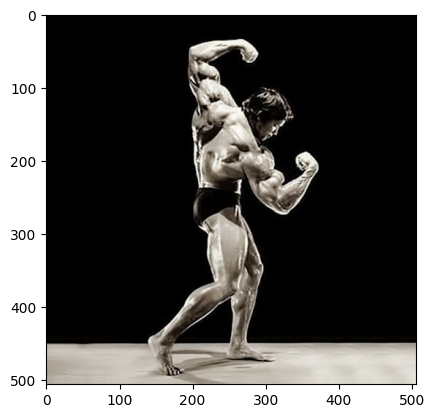

In [16]:
plt.imshow(img)

In [17]:
R, G, B = cv2.split(img)

stride_horizontal, filtro_sobel_horizontal = load_filter("filtro_sobel_horizontal.txt")

R_sobel_horizontal = np.abs(correlation2D(R, filtro_sobel_horizontal, stride_horizontal))
G_sobel_horizontal = np.abs(correlation2D(G, filtro_sobel_horizontal, stride_horizontal))
B_sobel_horizontal = np.abs(correlation2D(B, filtro_sobel_horizontal, stride_horizontal))

stride_vertical, filtro_sobel_vertical = load_filter("filtro_sobel_vertical.txt")

R_sobel_vertical = np.abs(correlation2D(R, filtro_sobel_vertical, stride_vertical))
G_sobel_vertical = np.abs(correlation2D(G, filtro_sobel_vertical, stride_vertical))
B_sobel_vertical = np.abs(correlation2D(B, filtro_sobel_vertical, stride_vertical))


In [18]:
R_sobel_horizontal = histogram_expansion(R_sobel_horizontal )
G_sobel_horizontal = histogram_expansion(G_sobel_horizontal )
B_sobel_horizontal = histogram_expansion(B_sobel_horizontal )

In [19]:
img_sobel_horizontal  = cv2.merge((R_sobel_horizontal, G_sobel_horizontal, B_sobel_horizontal))

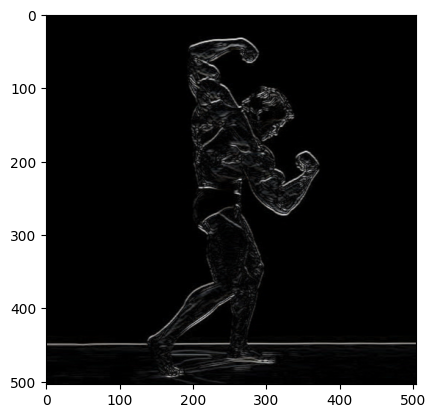

In [20]:
plt.imshow(img_sobel_horizontal)

In [21]:
R_sobel_vertical = histogram_expansion(R_sobel_vertical )
G_sobel_vertical = histogram_expansion(G_sobel_vertical )
B_sobel_vertical = histogram_expansion(B_sobel_vertical )

In [22]:
img_sobel_vertical  = cv2.merge((R_sobel_vertical, G_sobel_vertical, B_sobel_vertical))

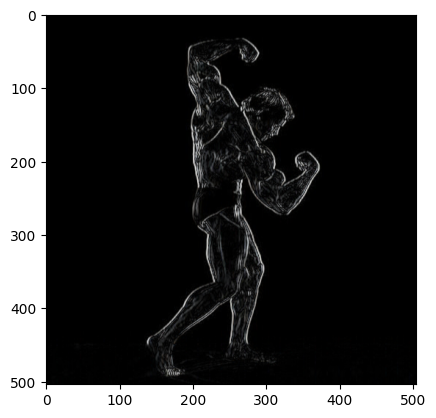

In [23]:
plt.imshow(img_sobel_vertical)

In [24]:
R_sobel = histogram_expansion(R_sobel_horizontal + R_sobel_vertical)
G_sobel = histogram_expansion(G_sobel_horizontal + G_sobel_vertical)
B_sobel = histogram_expansion(B_sobel_horizontal + B_sobel_vertical)

In [25]:
img_sobel  = cv2.merge((R_sobel, G_sobel, B_sobel))

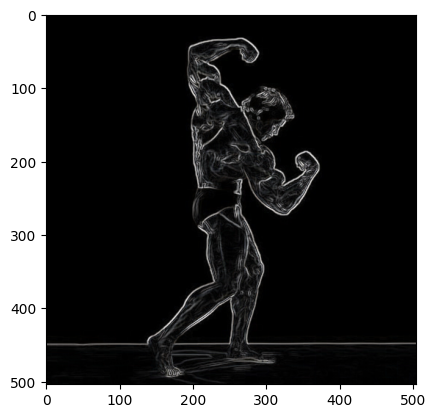

In [26]:
plt.imshow(img_sobel)